# SADAL : Semi - supervised Anomaly Detector combining Active learning and Learning to reject

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sadal import SADAL
from sklearn.model_selection import train_test_split

%matplotlib inline


def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

seed=15

## Generate an artificial 2D dataset

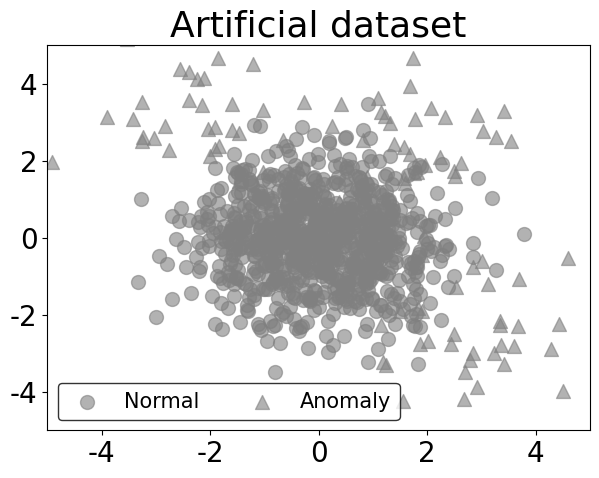

In [2]:
np.random.seed(seed)
dataset_size = 1000
numerical_col = [r'$X_1$',r'$X_2$']
class_prior = 0.9 #real class prior
contamination = 1-class_prior

a1_ = np.random.randn(2, int(dataset_size*(1-class_prior)/3))
a2_ = np.random.randn(2, int(dataset_size*(1-class_prior)/3))
a3_ = np.random.randn(2, int(dataset_size*contamination) - 2*int(dataset_size*(1-class_prior)/3))
num_anom = a1_.shape[1] + a2_.shape[1]+ a3_.shape[1]

n1_ = np.random.randn(2, int(dataset_size-num_anom))*1.1
y = -1*np.ones(dataset_size, dtype=int)
y[:num_anom] = +1


a1_[0, :] += 3
a1_[1, :] -= 2.5
a2_[0, :] -= 2.2
a2_[1, :] += 3
a3_[0, :] += 2
a3_[1, :] += 2.5

dataset = np.concatenate((a1_, a2_, a3_, n1_), axis=1).T
plt.figure(figsize=(7,5), facecolor='w', edgecolor='k')
cl0 = plt.scatter(dataset[:,0][y==-1],dataset[:,1][y==-1], 100, color="gray", marker = 'o', alpha = 0.6)
cl1 = plt.scatter(dataset[:,0][y==1],dataset[:,1][y==1], 100, color="gray", marker = '^', alpha = 0.6)
plt.xticks([-4,-2,0,2,4],[-4,-2,0,2,4],fontsize=20)
plt.yticks([-4,-2,0,2,4],[-4,-2,0,2,4],fontsize=20)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title("Artificial dataset",fontsize=26)
plt.legend((cl0, cl1),#, cl2
               ('Normal', 'Anomaly'),
               scatterpoints=1,
               loc='lower left',fontsize=15, 
               ncol=2,frameon=True).get_frame().set_edgecolor('black')
plt.show()


### We split the dataset into training and test set.

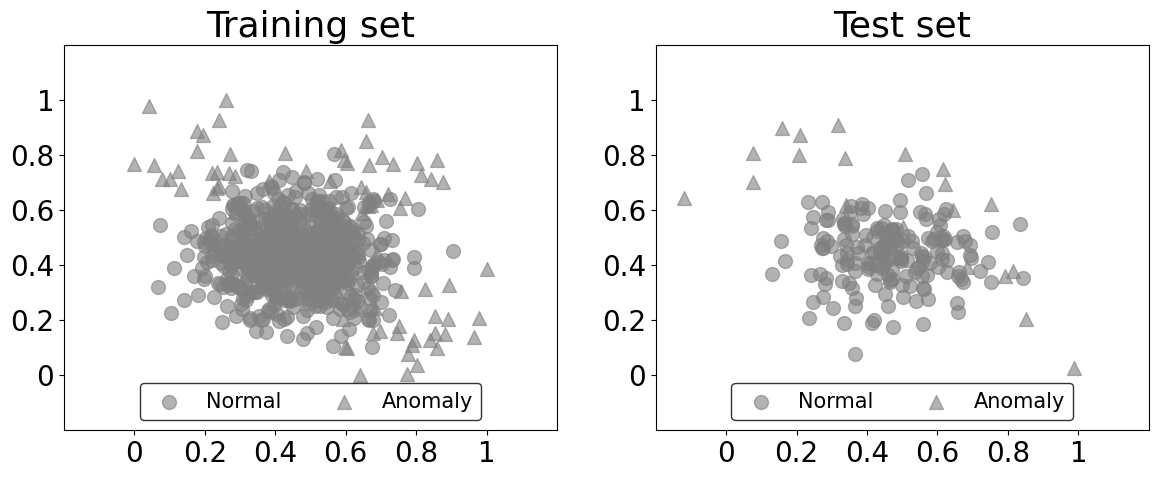

In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset,y, test_size=0.2, 
                                            random_state=seed,shuffle=True,stratify=y)

# normalize training and test set
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

#Plot training and test sets
plt.figure(figsize=(14, 5), facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
cl0 = plt.scatter(Xtrain[:,0][ytrain==-1],Xtrain[:,1][ytrain==-1], 100, color="gray", marker = 'o', alpha = 0.6)
cl1 = plt.scatter(Xtrain[:,0][ytrain==1],Xtrain[:,1][ytrain==1], 100, color="gray", marker = '^', alpha = 0.6)
plt.xticks([0,0.2, 0.4, 0.6, 0.8,1],[0,0.2, 0.4, 0.6, 0.8,1 ],fontsize=20)
plt.yticks([0,0.2, 0.4, 0.6, 0.8,1],[0,0.2, 0.4, 0.6, 0.8,1 ],fontsize=20)
plt.title("Training set",fontsize=26)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.legend((cl0, cl1),#, cl2
               ('Normal', 'Anomaly'),
               scatterpoints=1,
               loc='lower center',fontsize=15, 
               ncol=2,frameon=True).get_frame().set_edgecolor('black')

plt.subplot(1, 2, 2)
cl0 = plt.scatter(Xtest[:,0][ytest==-1],Xtest[:,1][ytest==-1], 100, color="gray", marker = 'o', alpha = 0.6)
cl1 = plt.scatter(Xtest[:,0][ytest==1],Xtest[:,1][ytest==1], 100, color="gray", marker = '^', alpha = 0.6)
plt.xticks([0,0.2, 0.4, 0.6, 0.8,1],[0,0.2, 0.4, 0.6, 0.8,1],fontsize=20)
plt.yticks([0,0.2, 0.4, 0.6, 0.8,1],[0,0.2, 0.4, 0.6, 0.8,1],fontsize=20)
plt.title("Test set",fontsize=26)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.legend((cl0, cl1),#, cl2
               ('Normal', 'Anomaly'),
               scatterpoints=1,
               loc='lower center',fontsize=15, 
               ncol=2,frameon=True).get_frame().set_edgecolor('black')
plt.show()

## Start the allocation loop

We start from an unlabeled dataset and use the SADAL algorithm to run the allocation loop. 

For this example, we run 10 allocation rounds where we allocate 2% of the training size at each round.

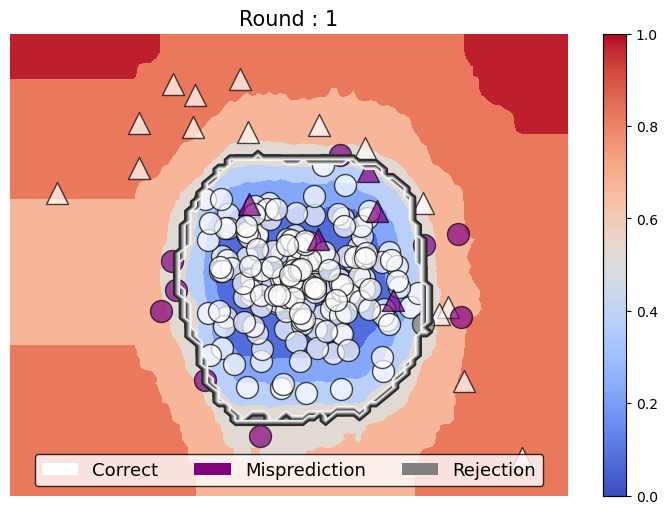

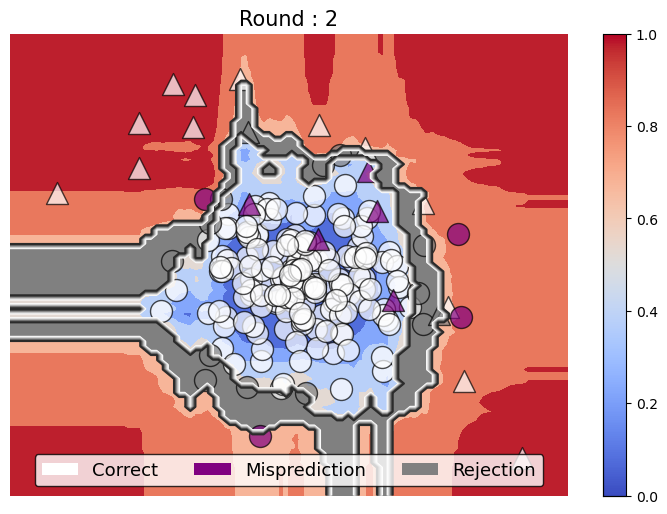

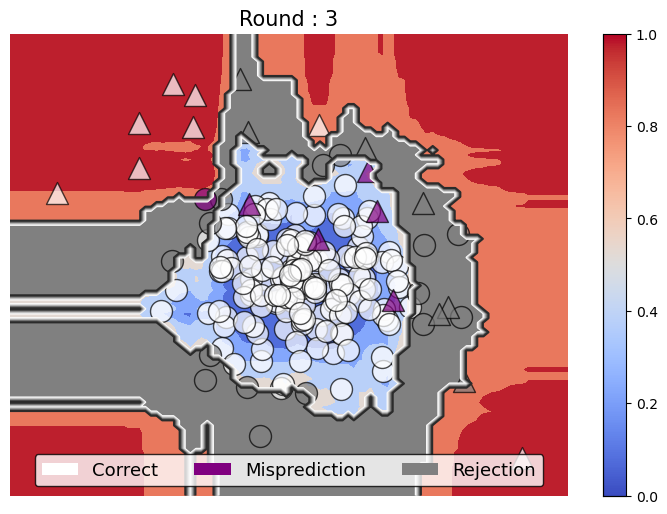

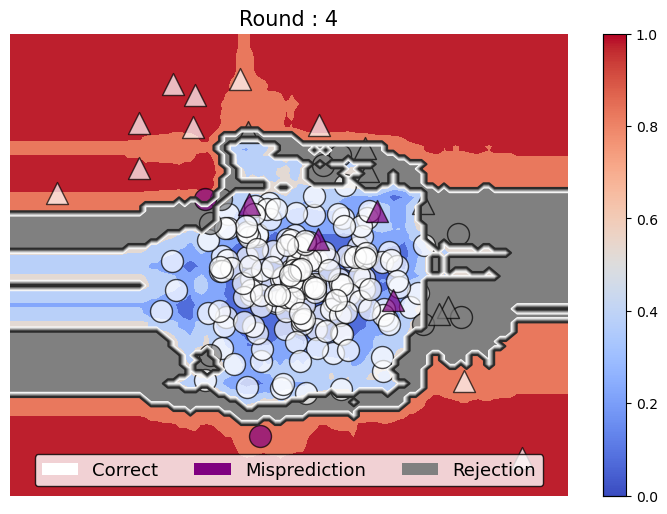

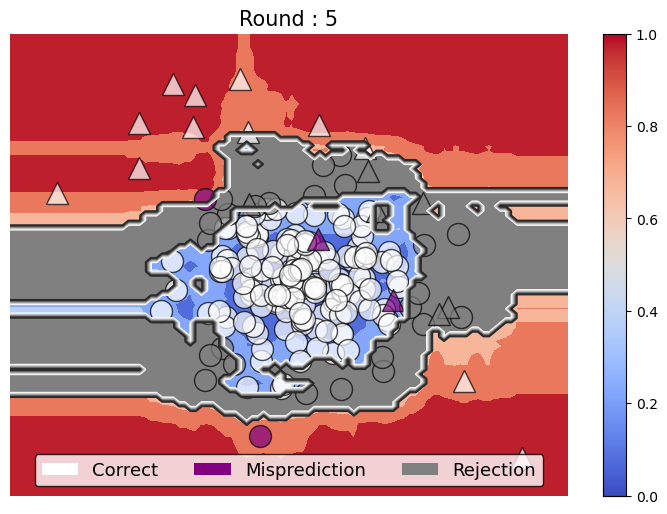

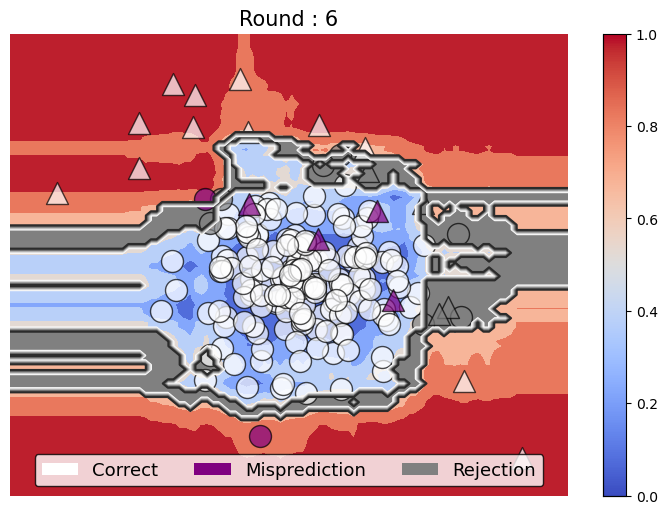

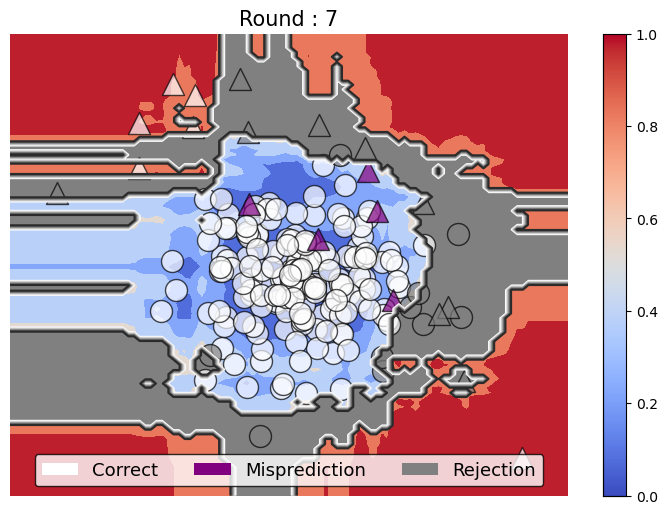

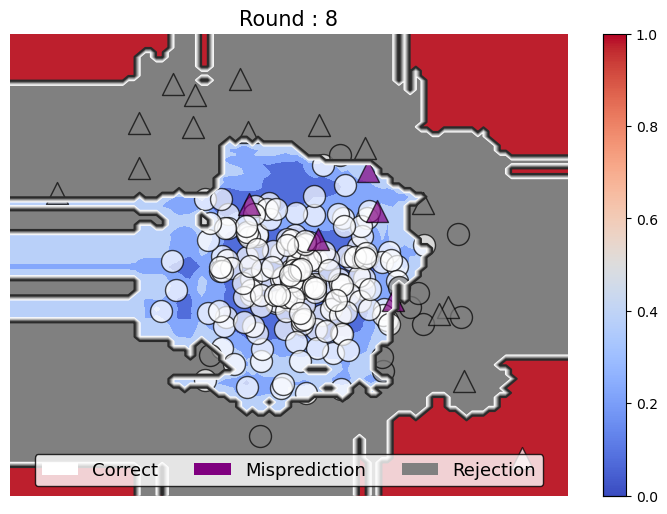

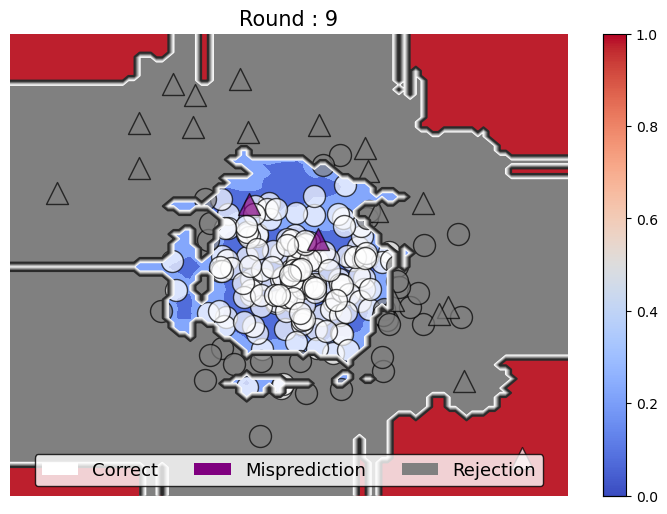

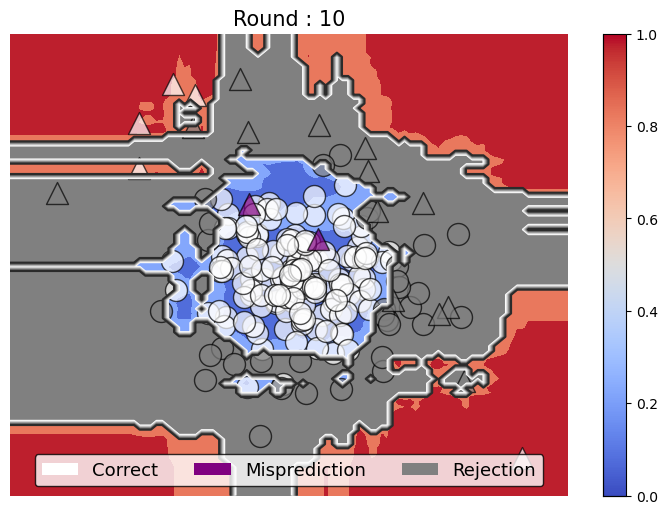

In [4]:
nrounds = 10
budget_per_round = 0.02
budget =  int(Xtrain.shape[0]*nrounds*budget_per_round)

model = SADAL(Xtrain, ytrain, contamination)
tc, fnr, fpr, rr = model.run_allocation_loop(nrounds, budget, Xtest, ytest, plots=True)

## Evaluation

To assess SADAL's performance, we plot the average test cost per instance as a function of the allocation round.

Text(0.5, 0, 'Allocation round ($k$)')

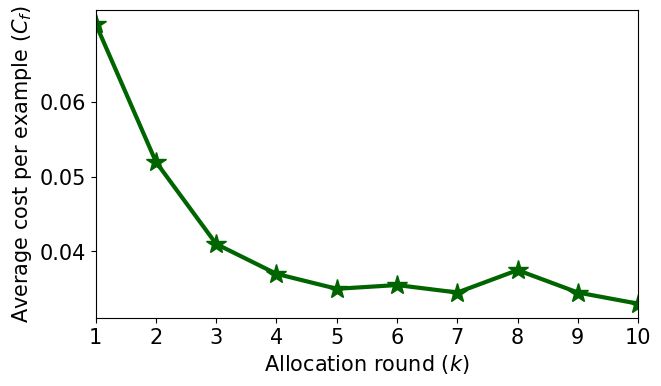

In [5]:
plt.figure(figsize=(7,4))
plt.plot(range(nrounds), tc, '-*', markersize=15, color='darkgreen', linewidth=3)
plt.xticks(range(10), range(1,11), fontsize=15)
plt.yticks([0.04,0.05,0.06], [0.04,0.05,0.06], fontsize=15)
plt.ylabel(r'Average cost per example ($C_f$)',fontsize = 15)
plt.xlim([0,9])
plt.xlabel(r'Allocation round ($k$)', fontsize = 15)